# Creating a Filter, Edge Detection

### Import resources and display image

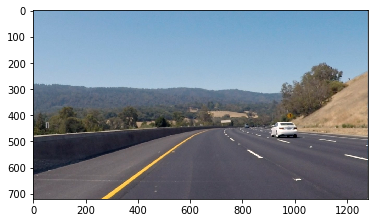

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

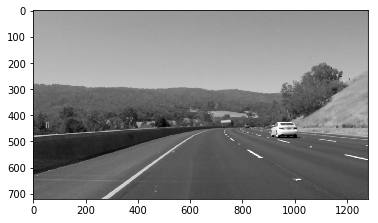

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

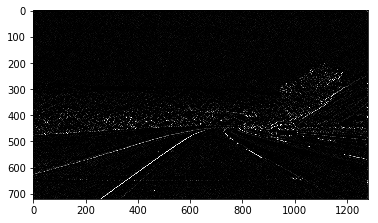

In [6]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
filtered_image = cv2.filter2D(filtered_image, -1, sobel_x)
plt.imshow(filtered_image, cmap='gray')

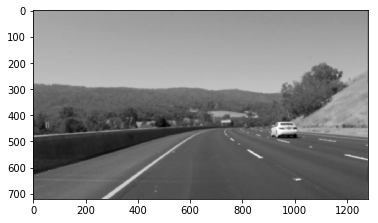

In [9]:
img_blur = cv2.GaussianBlur(gray, (11,11), 0, 0)
plt.imshow(img_blur, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



In [3]:
def dodgeNaive(image, mask):
    # determine the shape of the input image
    width,height = image.shape[:2]
    # prepare output argument with same size as image
    blend = np.zeros((width,height), np.uint8)
    for col in xrange(width):
        for row in xrange(height):
            # shift image pixel value by 8 bits
            # divide by the inverse of the mask
            tmp = (image[c,r] << 8) / (255.-mask)
            # make sure resulting value stays within bounds
            if tmp > 255:
                tmp = 255
                blend[c,r] = tmp
    return blend

In [4]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [6]:
def burnV2(image, mask):
    return 255 - cv2.divide(255-image, 255-mask, scale=256)

In [8]:
def render(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (21,21), 0, 0)
    img_blend = cv2.divide(img_gray, img_blur, scale=256)
    return img_blend

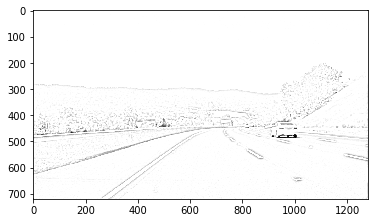

In [11]:
img2 = render(image)
plt.imshow(img2, cmap='gray')

Goals
Learn to:

Blur the images with various low pass filters
Apply custom-made filters to images (2D convolution)
2D Convolution ( Image Filtering )
As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function cv2.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

K=125⎡⎣⎢⎢⎢⎢⎢⎢1111111111111111111111111⎤⎦⎥⎥⎥⎥⎥⎥
Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25
    8 dst = cv2.filter2D(img,-1,kernel)
    9 
   10 plt.subplot(121),plt.imshow(img),plt.title('Original')
   11 plt.xticks([]), plt.yticks([])
   12 plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
   13 plt.xticks([]), plt.yticks([])
   14 plt.show()

In [11]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

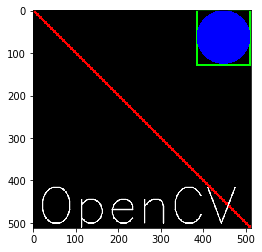

In [4]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)